In [1]:
sfcrime = spark.read.format("csv")\
.option("sep", ",")\
.option("header", "True")\
.option("inferSchema", "True")\
.option("path","bigdata/dataset/train.csv").load()

In [2]:
sfcrime.printSchema()

root
 |-- Dates: timestamp (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)



In [3]:
# visualizzazione dei dati
sfcrime.show(5)

+-------------------+--------------+--------------------+---------+----------+--------------+--------------------+-------------------+------------------+
|              Dates|      Category|            Descript|DayOfWeek|PdDistrict|    Resolution|             Address|                  X|                 Y|
+-------------------+--------------+--------------------+---------+----------+--------------+--------------------+-------------------+------------------+
|2015-05-13 23:53:00|      WARRANTS|      WARRANT ARREST|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:53:00|OTHER OFFENSES|TRAFFIC VIOLATION...|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:33:00|OTHER OFFENSES|TRAFFIC VIOLATION...|Wednesday|  NORTHERN|ARREST, BOOKED|VANNESS AV / GREE...|   -122.42436302145|  37.8004143219856|
|2015-05-13 23:30:00| LARCENY/THEFT|GRAND THEFT FROM ...|Wednesday|  NORTHER

### Preprocessing

In [4]:
# drop duplicate rows
prev_count = sfcrime.count()
sfcrime = sfcrime.dropDuplicates()
print("Numero di righe duplicate: ", prev_count - sfcrime.count())

Numero di righe duplicate:  2323


In [ ]:
# Outliers : https://www.kaggle.com/code/bananawolf/random-forest-knn-logistic-regression

Dataset inspection

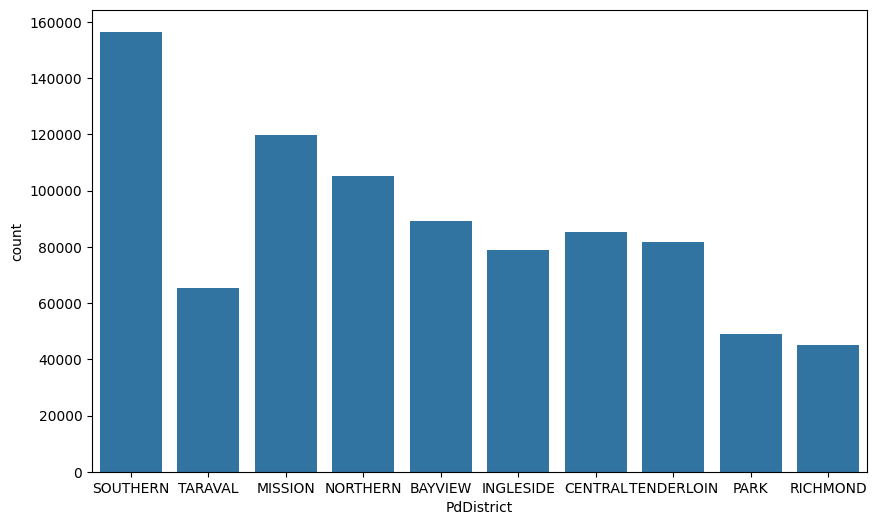

In [5]:
# visualize piechart of districts distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql.functions import col

# convert spark dataframe to pandas dataframe

sfcrime_pd = sfcrime.toPandas()
sfcrime_pd.head()

# plot the distribution of districts
plt.figure(figsize=(10,6))
sns.countplot(x='PdDistrict', data=sfcrime_pd)
plt.show()



In [51]:
from pyspark.sql.functions import *
df = sfcrime 
df = df.withColumn('Year',year("Dates"))
df = df.withColumn('Month',month("Dates"))
df = df.withColumn('Day',dayofmonth("Dates"))
df = df.withColumn('Hour',hour("Dates"))

In [8]:
df.show(5)

+-------------------+-------------+--------------------+---------+----------+--------------+--------------------+-------------------+-----------------+----+-----+---+----+
|              Dates|     Category|            Descript|DayOfWeek|PdDistrict|    Resolution|             Address|                  X|                Y|Year|Month|Day|Hour|
+-------------------+-------------+--------------------+---------+----------+--------------+--------------------+-------------------+-----------------+----+-----+---+----+
|2015-05-13 19:30:00|LARCENY/THEFT|GRAND THEFT FROM ...|Wednesday|  SOUTHERN|          NONE|500 Block of BRAN...|  -122.397615567933| 37.7773918242817|2015|    5| 13|  19|
|2015-05-12 19:00:00|     BURGLARY|BURGLARY, HOT PRO...|  Tuesday|   TARAVAL|          NONE|2100 Block of 43R...|   -122.50180154774|37.74655644758779|2015|    5| 12|  19|
|2015-05-11 19:45:00|      ASSAULT|             BATTERY|   Monday|   MISSION|          NONE|4000 Block of 18T...|-122.43444692866699| 37.760

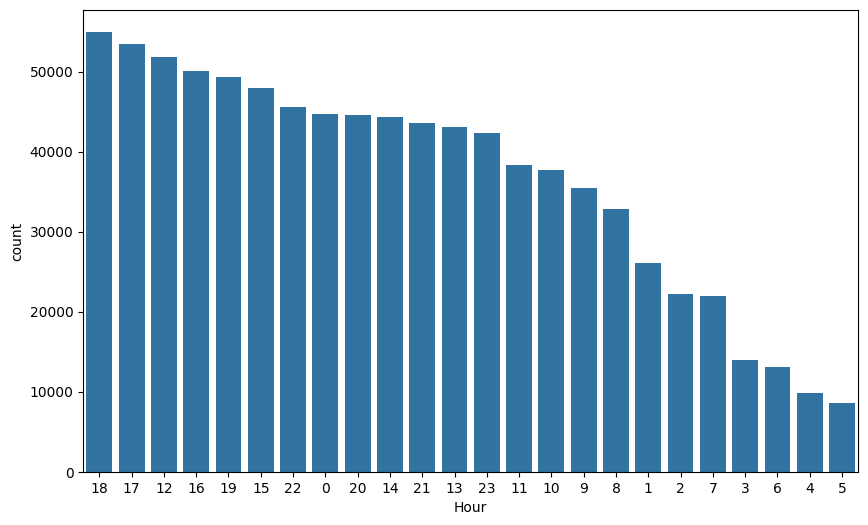

In [9]:
# histogram for crime per hour
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df.toPandas(), order=df.toPandas()['Hour'].value_counts().index)
plt.show()

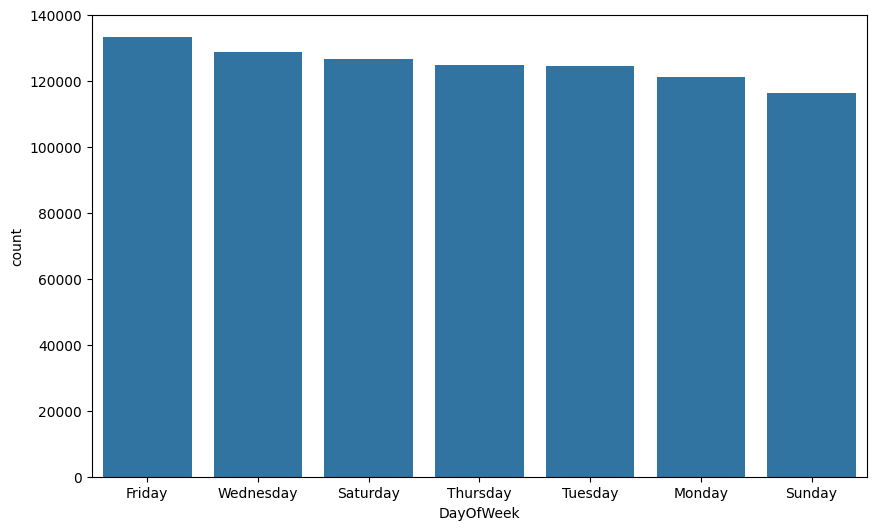

In [11]:
# histogram for crime per day of week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=df.toPandas(), order=df.toPandas()['DayOfWeek'].value_counts().index)
plt.show()

In [36]:
# quanti crimini in ogni anno?
df.groupBy('Year').count().show()
# tabella pivot
df.groupBy('Year').pivot('Category').count().show()

+----+-----+
|Year|count|
+----+-----+
|2003|73744|
|2007|67841|
|2015|27522|
|2006|69713|
|2013|75412|
|2014|74563|
|2004|73201|
|2012|71558|
|2009|68771|
|2005|70596|
|2010|66354|
|2011|66475|
|2008|69976|
+----+-----+



23/12/05 16:13:20 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+-----+-------+----------+-------+--------+------------------+---------------------------+-------------+-----------+------------+---------+---------------+----------------------+-----+--------+----------+-------------+-----------+---------+--------------+------------+--------------+-----------------------+------------+-----------------+-------+-------+---------------+---------------------+-------------------------+---------------+-------+--------------+----+--------+---------+-------------+--------+-----------+
|Year|ARSON|ASSAULT|BAD CHECKS|BRIBERY|BURGLARY|DISORDERLY CONDUCT|DRIVING UNDER THE INFLUENCE|DRUG/NARCOTIC|DRUNKENNESS|EMBEZZLEMENT|EXTORTION|FAMILY OFFENSES|FORGERY/COUNTERFEITING|FRAUD|GAMBLING|KIDNAPPING|LARCENY/THEFT|LIQUOR LAWS|LOITERING|MISSING PERSON|NON-CRIMINAL|OTHER OFFENSES|PORNOGRAPHY/OBSCENE MAT|PROSTITUTION|RECOVERED VEHICLE|ROBBERY|RUNAWAY|SECONDARY CODES|SEX OFFENSES FORCIBLE|SEX OFFENSES NON FORCIBLE|STOLEN PROPERTY|SUICIDE|SUSPICIOUS OCC|TREA|TRESPASS|VA

In [45]:
#address
df.groupBy('Address').count().sort('count', ascending = False).show()

+--------------------+-----+
|             Address|count|
+--------------------+-----+
|800 Block of BRYA...|26245|
|800 Block of MARK...| 6576|
|2000 Block of MIS...| 5094|
|1000 Block of POT...| 4046|
|900 Block of MARK...| 3245|
|  0 Block of TURK ST| 3224|
|   0 Block of 6TH ST| 2882|
|300 Block of ELLI...| 2701|
|400 Block of ELLI...| 2584|
|16TH ST / MISSION ST| 2501|
|1000 Block of MAR...| 2487|
|1100 Block of MAR...| 2315|
|2000 Block of MAR...| 2166|
|100 Block of OFAR...| 2135|
|700 Block of MARK...| 2075|
|3200 Block of 20T...| 2030|
| 100 Block of 6TH ST| 1886|
|500 Block of JOHN...| 1812|
| TURK ST / TAYLOR ST| 1810|
|200 Block of TURK ST| 1796|
+--------------------+-----+
only showing top 20 rows



In [47]:
#visualizzare tipologia di crimini nell'area in cui si sono registrati più crimini
df1 = df.where(col('Address')=='800 Block of BRYANT ST')
df1.groupBy('Category').count().sort('count', ascending=False).show()

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|       LARCENY/THEFT| 6089|
|        NON-CRIMINAL| 5418|
|      OTHER OFFENSES| 3010|
|             ASSAULT| 1925|
|            WARRANTS| 1713|
|           VANDALISM| 1149|
|      SUSPICIOUS OCC| 1148|
|               FRAUD|  924|
|       DRUG/NARCOTIC|  786|
|      MISSING PERSON|  772|
|FORGERY/COUNTERFE...|  606|
|             ROBBERY|  589|
|            BURGLARY|  382|
|     SECONDARY CODES|  311|
|SEX OFFENSES FORC...|  293|
|         WEAPON LAWS|  156|
|            TRESPASS|  150|
|       VEHICLE THEFT|  128|
|         DRUNKENNESS|  100|
|          KIDNAPPING|   97|
+--------------------+-----+
only showing top 20 rows



In [49]:
#category distribution
df.groupBy('Category').count().sort('count', ascending=False).show()

+--------------------+------+
|            Category| count|
+--------------------+------+
|       LARCENY/THEFT|174320|
|      OTHER OFFENSES|125960|
|        NON-CRIMINAL| 91915|
|             ASSAULT| 76815|
|       DRUG/NARCOTIC| 53919|
|       VEHICLE THEFT| 53706|
|           VANDALISM| 44581|
|            WARRANTS| 42145|
|            BURGLARY| 36600|
|      SUSPICIOUS OCC| 31394|
|      MISSING PERSON| 25669|
|             ROBBERY| 22988|
|               FRAUD| 16637|
|FORGERY/COUNTERFE...| 10592|
|     SECONDARY CODES|  9979|
|         WEAPON LAWS|  8550|
|        PROSTITUTION|  7446|
|            TRESPASS|  7318|
|     STOLEN PROPERTY|  4537|
|SEX OFFENSES FORC...|  4380|
+--------------------+------+
only showing top 20 rows



In [62]:
#Street number extraction
df = df.withColumn('StreetNo', when(type(df['Address'].split(' ')[0])==Integer, lit(1).otherwise(lit(0))))
df.show()

TypeError: 'Column' object is not callable

In [55]:
#Block feature extraction: 1 if block present, 0 otherwise
df = df.withColumn('Block', when(df.Address.like("%Block%") , lit(1)).otherwise(lit(0)))
df.show()

+-------------------+---------------+--------------------+---------+----------+--------------+--------------------+-------------------+------------------+----+-----+---+----+-----+
|              Dates|       Category|            Descript|DayOfWeek|PdDistrict|    Resolution|             Address|                  X|                 Y|Year|Month|Day|Hour|Block|
+-------------------+---------------+--------------------+---------+----------+--------------+--------------------+-------------------+------------------+----+-----+---+----+-----+
|2015-05-13 19:30:00|  LARCENY/THEFT|GRAND THEFT FROM ...|Wednesday|  SOUTHERN|          NONE|500 Block of BRAN...|  -122.397615567933|  37.7773918242817|2015|    5| 13|  19|    1|
|2015-05-12 19:00:00|       BURGLARY|BURGLARY, HOT PRO...|  Tuesday|   TARAVAL|          NONE|2100 Block of 43R...|   -122.50180154774| 37.74655644758779|2015|    5| 12|  19|    1|
|2015-05-11 19:45:00|        ASSAULT|             BATTERY|   Monday|   MISSION|          NONE|4